# **1.Data Exploration**

In [70]:
!pip install catboost

In [71]:
# Importing Necessary Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.pipeline import Pipeline

import itertools

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
nltk.download('stopwords')
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Load Dataset**

In [72]:
#Upload the Dataset
from google.colab import files
uploaded = files.upload()

Saving Clean_data_1.csv to Clean_data_1 (1).csv


In [73]:
# Dataset is now stored in a Pandas Dataframe
import io
data = pd.read_csv(io.BytesIO(uploaded['Clean_data_1.csv']))

In [74]:
# Print Multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# **2.Data Visualization (EDA)**

In [75]:
#Explore Data
data.shape
type(data)
data.size
data.shape
data.head()
data.tail()
data.info()

(10006, 17)

pandas.core.frame.DataFrame

170102

(10006, 17)

,Unnamed: 0,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,User_id,Sentiment,Label,Text_Clean,lemmatized,polarity,token,review_length
0,0,0,La Quinta,5820 Walden Rd,Beaumont,This hotel is a dump! Upon ch...,margierodriguez.mcqueen,This hotel is a dump! Upon checking in was tol...,1,15400,Negative,0,this hotel is a dump upon checking in was told...,hotel dump check tell place book folk run isaa...,0.188788,"['this', 'hotel', 'is', 'a', 'dump', 'upon', '...",209
1,1,1,The Point,Po Box 1327,Saranac Lake,Great family time,motomomMaryland,The point is possibly one of our favorite rest...,5,15740,Positive,1,the point is possibly one of our favorite rest...,point possibly favorite restaurant child age f...,0.350000,"['the', 'point', 'is', 'possibly', 'one', 'of'...",60
2,2,1,The Point,Po Box 1327,Saranac Lake,Throw back to the Gatsby Era - don't miss The ...,ellen00007,From the minute you arrive until the minute yo...,5,13760,Positive,1,from the minute you arrive until the minute yo...,minute arrive minute sadly leave point treat p...,0.233333,"['from', 'the', 'minute', 'you', 'arrive', 'un...",67
3,3,1,The Point,Po Box 1327,Saranac Lake,The Point of it all,Szerzek,That is the name on one of their boats. And th...,5,11027,Positive,1,that is the name on one of their boats and the...,boat essence philosophy get point right warm c...,0.372857,"['that', 'is', 'the', 'name', 'on', 'one', 'of...",66
4,4,1,The Point,Po Box 1327,Saranac Lake,The most amazing week end!,Sarahbnyc83,I was lucky enough to spend 2 nights at The Po...,5,10306,Positive,1,i was lucky enough to spend nights at the poin...,lucky spend night point year february dream pl...,-0.043434,"['i', 'was', 'lucky', 'enough', 'to', 'spend',...",65


,Unnamed: 0,Hotel_id,Hotel,Address,City,Title,Users,Reviews,Rating,User_id,Sentiment,Label,Text_Clean,lemmatized,polarity,token,review_length
10001,10001,1362,Best Western Plus Columbia North East,7525 Two Notch Rd,Columbia,"Amazind hotel, nice desk staff!",MissOutandAbout,My husband and I were moving to fort Bragg and...,5,8182,Positive,1,my husband and i were moving to fort bragg and...,husband move fort bragg happen got tired drivi...,0.305966,"['my', 'husband', 'and', 'i', 'were', 'moving'...",69
10002,10002,1362,Best Western Plus Columbia North East,7525 Two Notch Rd,Columbia,Very Satisified,Timothy J. M,I have stayed at this location in the past and...,5,11423,Positive,1,i have stayed at this location in the past and...,stay location past time get well staff friendl...,0.255208,"['i', 'have', 'stayed', 'at', 'this', 'locatio...",56
10003,10003,1362,Best Western Plus Columbia North East,7525 Two Notch Rd,Columbia,Army Graduation,lorif500,Helpful cheerful staff. Updated hotel in good ...,4,15251,Positive,1,helpful cheerful staff updated hotel in good a...,helpful cheerful staff update hotel good area ...,0.186574,"['helpful', 'cheerful', 'staff', 'updated', 'h...",70
10004,10004,1362,Best Western Plus Columbia North East,7525 Two Notch Rd,Columbia,Everything you could ask for in an overnight.,stevewV5074XV,I almost always stay at Best Western propertie...,5,16851,Positive,1,i almost always stay at best western propertie...,stay good western property like support indepe...,0.209524,"['i', 'almost', 'always', 'stay', 'at', 'best'...",40
10005,10005,1362,Best Western Plus Columbia North East,7525 Two Notch Rd,Columbia,Nice stop for our road trip,A Traveler1,This was a stop for us on our roadtrip to Flor...,5,17580,Positive,1,this was a stop for us on our roadtrip to flor...,stop roadtrip florida need provide crib reques...,0.000000,"['this', 'was', 'a', 'stop', 'for', 'us', 'on'...",33


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10006 entries, 0 to 10005
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10006 non-null  int64  
 1   Hotel_id       10006 non-null  int64  
 2   Hotel          10006 non-null  object 
 3   Address        10006 non-null  object 
 4   City           10006 non-null  object 
 5   Title          10006 non-null  object 
 6   Users          10006 non-null  object 
 7   Reviews        10006 non-null  object 
 8   Rating         10006 non-null  int64  
 9   User_id        10006 non-null  int64  
 10  Sentiment      10006 non-null  object 
 11  Label          10006 non-null  int64  
 12  Text_Clean     10005 non-null  object 
 13  lemmatized     10002 non-null  object 
 14  polarity       10006 non-null  float64
 15  token          10006 non-null  object 
 16  review_length  10006 non-null  int64  
dtypes: float64(1), int64(6), object(10)
memory usage: 

In [76]:
# Checking for missing values
pd.isnull(data).any()
pd.isnull(data).sum()

Unnamed: 0       False
Hotel_id         False
Hotel            False
Address          False
City             False
Title            False
Users            False
Reviews          False
Rating           False
User_id          False
Sentiment        False
Label            False
Text_Clean        True
lemmatized        True
polarity         False
token            False
review_length    False
dtype: bool

Unnamed: 0       0
Hotel_id         0
Hotel            0
Address          0
City             0
Title            0
Users            0
Reviews          0
Rating           0
User_id          0
Sentiment        0
Label            0
Text_Clean       1
lemmatized       4
polarity         0
token            0
review_length    0
dtype: int64

In [77]:
# Dropping the missing values
data = data.dropna()
data = data.reset_index(drop=True)
print('Shape of dataset ',data.shape)
print(data.columns)

Shape of dataset  (10002, 17)
Index(['Unnamed: 0', 'Hotel_id', 'Hotel', 'Address', 'City', 'Title', 'Users',
       'Reviews', 'Rating', 'User_id', 'Sentiment', 'Label', 'Text_Clean',
       'lemmatized', 'polarity', 'token', 'review_length'],
      dtype='object')


In [78]:
# Sentiment Count
data.Sentiment.value_counts()


Positive    7434
Negative    2568
Name: Sentiment, dtype: int64

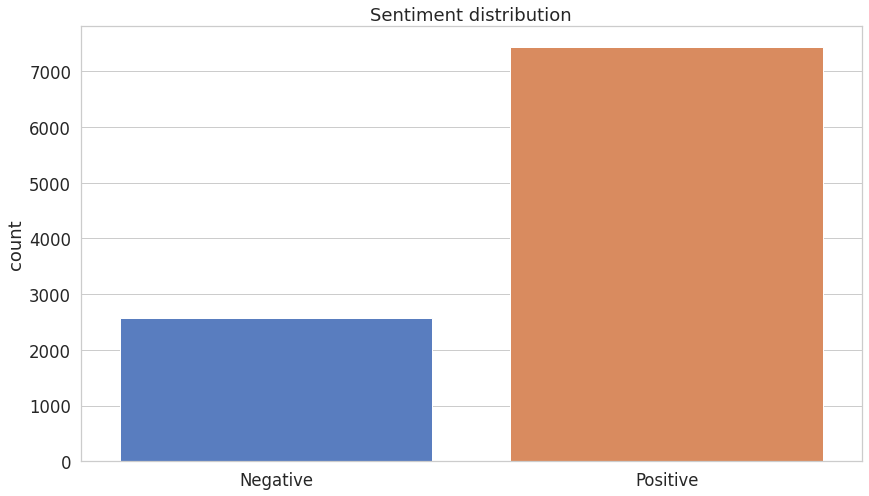

In [79]:
# Plot Showing Sentiment Distribution
f = sns.countplot(x='Sentiment', data=data)
f.set_title("Sentiment distribution")
f.set_xticklabels(['Negative', 'Positive'])
plt.xlabel("");

In [80]:
positive_sentiment=data[data['Sentiment'] == 'Positive']
negative_sentiment=data[data['Sentiment']=='Negative']

In [81]:

Reviews_all=" ".join(review for review in data.Sentiment)
Reviews_positive=" ".join(review for review in positive_sentiment.Reviews)


In [82]:
Reviews_negative=" ".join(review for review in negative_sentiment.Reviews)

/usr/local/lib/python3.6/dist-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/root/nltk_data/corpora/stopwords/english'>
  return concat([self.open(f).read() for f in fileids])


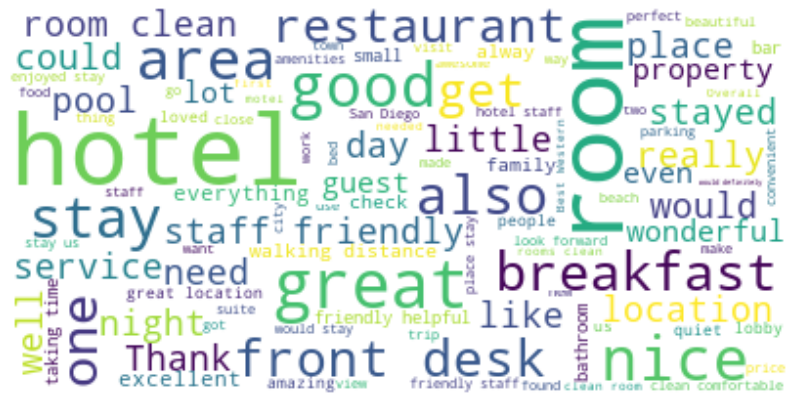

In [83]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(Reviews_positive)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

/usr/local/lib/python3.6/dist-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning: unclosed file <_io.BufferedReader name='/root/nltk_data/corpora/stopwords/english'>
  return concat([self.open(f).read() for f in fileids])


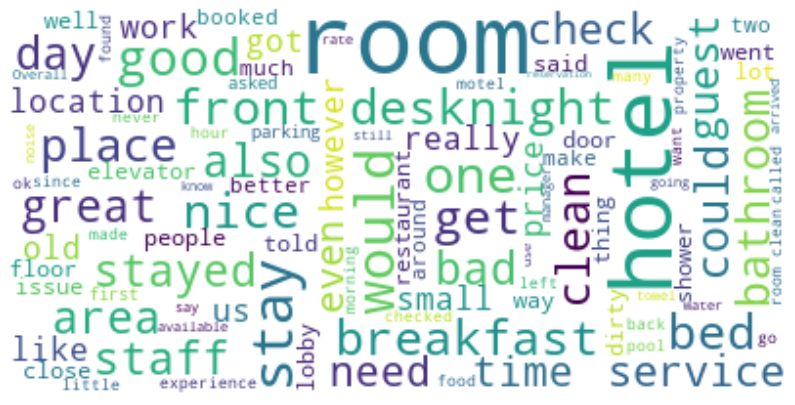

In [84]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(Reviews_negative)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

**Splitting Dataset into Train and Test Set**


In [85]:
# Splitting the Data Set into Train and Test Sets
X = data['lemmatized']
y = data['Label']

In [86]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [87]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(7501,)
Test Set Shape		:(2501,)


**Confusion Matrix Plot Function**


In [88]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'Positive' and 'Negative' Sentiments 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [89]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

# **3.Modelling**


This is a supervised binary classification problem. We are trying to predict the sentiment based on the reviews left by customers who stayed in various different hotels and based on their stay they left the comments in travel websites. We used Python’s Scikit Learn libraries to solve the problem. In this context, we implemented Logistic Regression, Random Forest, Naive Bayes, XGBOOST, and Catboost algorithms. Besides that, I implemented deep learning technique with Keras.

Since the ratings of the reviews were not distributed normally, I decided to decrease rating classes from 5 to 2 by merging Rating 1-2-3 as 'Negative' and Rating 4-5 as 'Positive'.

For feature selection, I applied threshold for word occurence with using min_df/max_df, PCA and Singular Value Decomposition.

For feature engineering, I applied CountVectorizer, TF-IDF and Word2Vec, CNN,RNN and Factorization machine to the text data in order to turn a collection of text documents into numerical feature vectors.

**3.1 CountVectorizer Bag of Words**

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

"CountVectorizer" implements both tokenization and occurrence counting in a single class

In [90]:
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
count_vect_test = count_vect_test.toarray()

In [91]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 16698


In [92]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [93]:
# Dataframe for train countvectorizer dataset
pd.DataFrame(count_vect_train, columns = vocab).head()

,aaa,aaaa,aaaaarp,aan,aanwezig,aaron,aarp,aback,abandon,abbiamo,abc,abd,aber,aberdeen,abide,ability,abject,abjectly,able,ablemore,ablemorethank,abominableeven,abordable,abound,abour,aboutmore,aboutstaff,abouttick,aboveandbeyond,aboveaverage,abri,abroad,abrupt,absecon,absence,absent,absiolutley,absolute,absolutely,absolutley,...,yucca,yuck,yuckbe,yuk,yukon,yum,yuma,yumdear,yumgaby,yummer,yummy,yup,yur,zabriskiboundthank,zack,zacks,zak,zapper,zealand,zen,zentral,zentrale,zero,ziegenbock,zijn,zimmer,zion,zipped,zlbenitesthank,zoe,zonas,zone,zoo,zoobreakfast,zu,zum,zydecomm,â¼,â½cor,â½ã
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Creating a function for applying different algorithms**


In [94]:
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    score = f1_score(y_test, y_pred, average = 'weighted')
    
    # Printing evaluation metric (f1-score) 
    print("f1 score: {}".format(score))

**Dummy Classifier**


In [95]:
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = f1_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (f1-score) 
print("f1 score: {}".format(score))

DummyClassifier(constant=None, random_state=42, strategy='stratified')

f1 score: 0.6241236865171071


In [96]:
# Compute and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.26      0.26       626
           1       0.75      0.74      0.75      1875

    accuracy                           0.62      2501
   macro avg       0.50      0.50      0.50      2501
weighted avg       0.63      0.62      0.62      2501



**Logistic Regression with CountVectorizer**

In [97]:
# Call the modeling function for logistic regression with countvectorizer and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

f1 score: 0.8412816328038991


**Classification Report**


In [98]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       626
           1       0.92      0.86      0.89      1875

    accuracy                           0.84      2501
   macro avg       0.78      0.81      0.79      2501
weighted avg       0.85      0.84      0.84      2501



**Confusion Matrix**


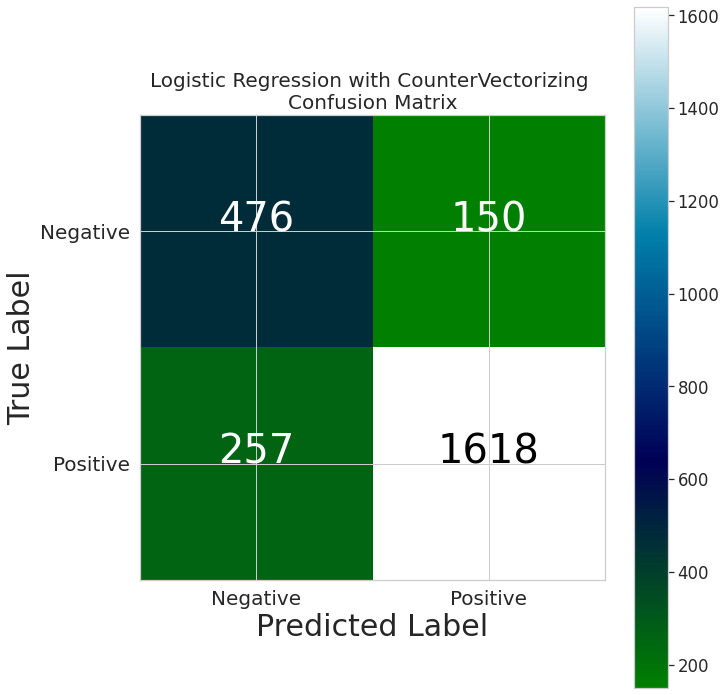

In [99]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

**Random Forest with CountVectorizer**

In [100]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

f1 score: 0.8132995657499698


**Classification Report**


In [101]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.87      0.41      0.55       626
           1       0.83      0.98      0.90      1875

    accuracy                           0.84      2501
   macro avg       0.85      0.69      0.73      2501
weighted avg       0.84      0.84      0.81      2501



**Confusion Matrix**


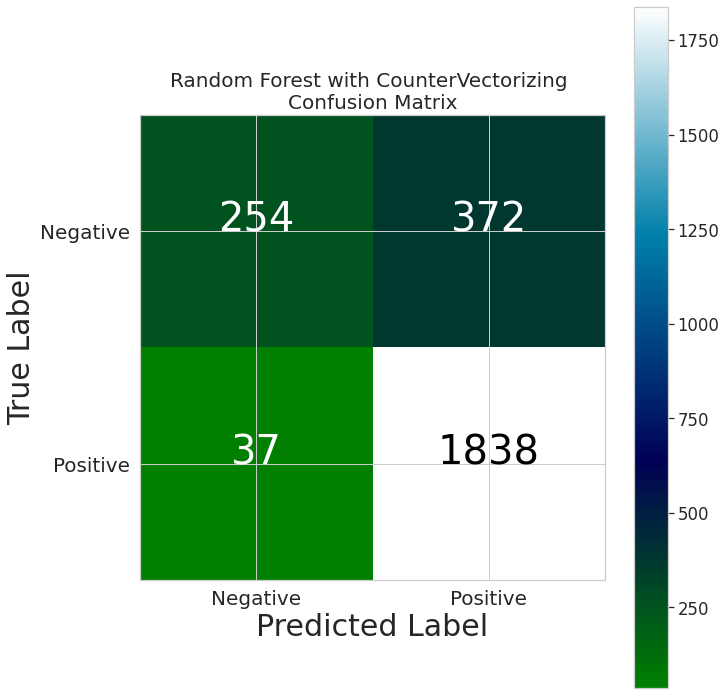

In [102]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

**Naive Bayes with CountVectorizer**

In [103]:
from sklearn.naive_bayes import MultinomialNB


In [104]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

f1 score: 0.8522154226146884


**Classification Report**


In [105]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.77      0.62      0.68       626
           1       0.88      0.94      0.91      1875

    accuracy                           0.86      2501
   macro avg       0.82      0.78      0.80      2501
weighted avg       0.85      0.86      0.85      2501



**Confusion Matrix**


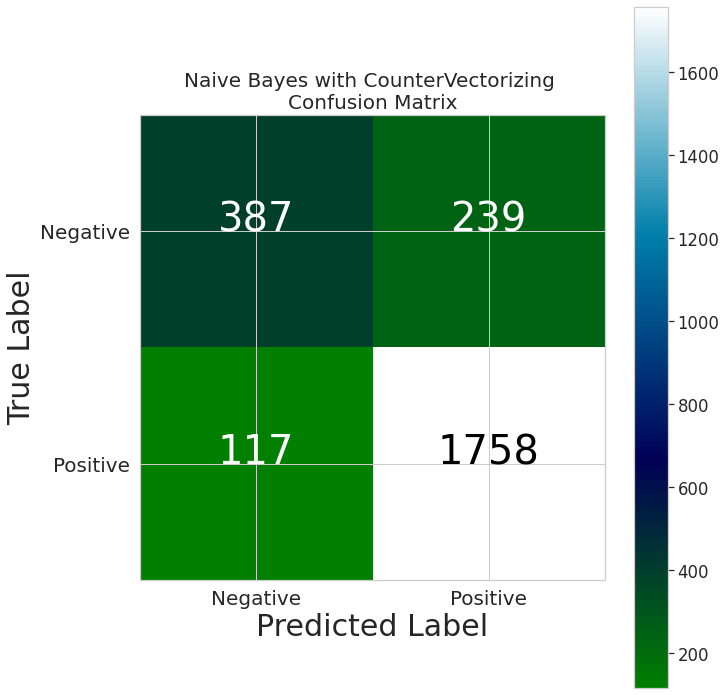

In [106]:
# Print confusion matrix for naive bayes with countVectorizer
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

**XG Boost with CountVectorizer**

In [107]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

f1 score: 0.8124043190756001


**Classification Report**


In [108]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.84      0.42      0.56       626
           1       0.83      0.97      0.90      1875

    accuracy                           0.83      2501
   macro avg       0.84      0.69      0.73      2501
weighted avg       0.84      0.83      0.81      2501



**Confusion Matrix**


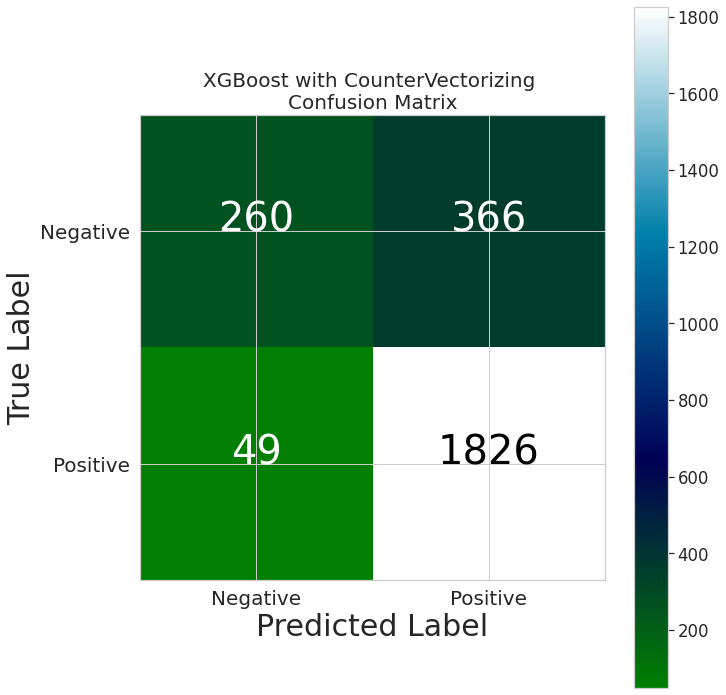

In [109]:
# Print confusion matrix for gradient boosting with countVectorizer
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

**CatBoost with CountVectorizer**

In [110]:
# Call the modeling function for CatBoost with countvectorizer and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, 
                            depth=2, loss_function='Logloss'))

# Assign y_pred to a variable for further process
y_pred_cv_catboost = y_pred

0:	learn: 0.5651088	total: 31.3ms	remaining: 3.1s
1:	learn: 0.5205743	total: 56.6ms	remaining: 2.77s
2:	learn: 0.4945674	total: 78.4ms	remaining: 2.54s
3:	learn: 0.4775053	total: 100ms	remaining: 2.4s
4:	learn: 0.4648586	total: 122ms	remaining: 2.31s
5:	learn: 0.4571740	total: 144ms	remaining: 2.26s
6:	learn: 0.4486083	total: 169ms	remaining: 2.25s
7:	learn: 0.4382030	total: 192ms	remaining: 2.2s
8:	learn: 0.4311153	total: 214ms	remaining: 2.16s
9:	learn: 0.4259447	total: 240ms	remaining: 2.16s
10:	learn: 0.4194978	total: 264ms	remaining: 2.13s
11:	learn: 0.4142627	total: 288ms	remaining: 2.11s
12:	learn: 0.4054367	total: 310ms	remaining: 2.08s
13:	learn: 0.3994032	total: 333ms	remaining: 2.04s
14:	learn: 0.3952930	total: 354ms	remaining: 2.01s
15:	learn: 0.3908440	total: 376ms	remaining: 1.97s
16:	learn: 0.3865391	total: 406ms	remaining: 1.98s
17:	learn: 0.3835094	total: 429ms	remaining: 1.95s
18:	learn: 0.3806173	total: 458ms	remaining: 1.95s
19:	learn: 0.3784584	total: 491ms	remaini

**Classification Report**


In [111]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_catboost))

              precision    recall  f1-score   support

           0       0.75      0.57      0.65       626
           1       0.87      0.94      0.90      1875

    accuracy                           0.84      2501
   macro avg       0.81      0.75      0.77      2501
weighted avg       0.84      0.84      0.84      2501



**Confusion Matrix**


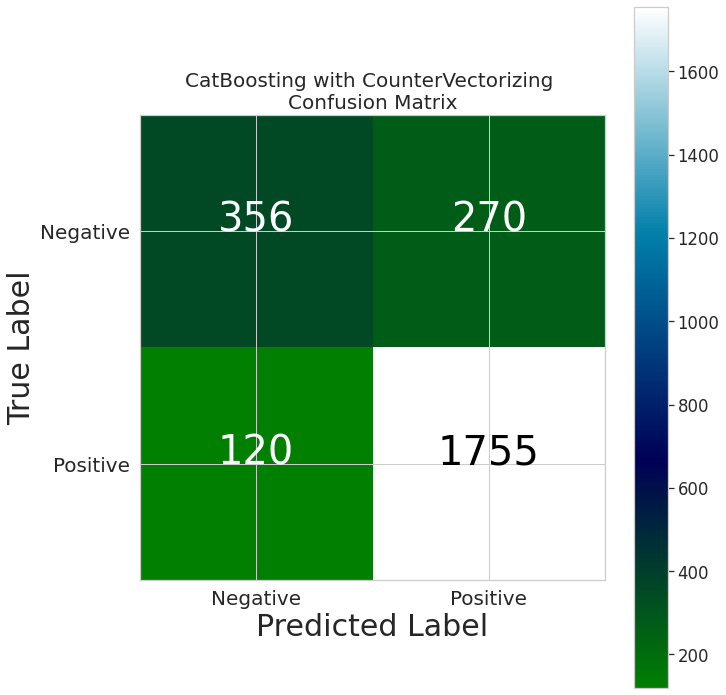

In [112]:

# Print confusion matrix for CatBoost with countVectorizer
disp_confusion_matrix(y_pred_cv_catboost, "CatBoosting")

**Comparison of Models with CountVectorizer**


In [113]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['Negative', 'Positive', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [114]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'accuracy', 'class'])
   



**Function for f1 Score Plotting**


In [115]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

In [116]:
from sklearn import metrics


In [117]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb, y_pred_cv_catboost], labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])
               

In [118]:
df_tv2

precision  ...  support
vectorizer model         accuracy class                ...         
CountVect  LogReg        0.837265 Negative   0.649386  ...    626.0
                                  Positive   0.915158  ...   1875.0
                                  average    0.848636  ...   2501.0
           Random Forest 0.836465 Negative   0.872852  ...    626.0
                                  Positive   0.831674  ...   1875.0
                                  average    0.841981  ...   2501.0
           Naive Bayes   0.857657 Negative   0.767857  ...    626.0
                                  Positive   0.880320  ...   1875.0
                                  average    0.852171  ...   2501.0
           XGBoost       0.834066 Negative   0.841424  ...    626.0
                                  Positive   0.833029  ...   1875.0
                                  average    0.835130  ...   2501.0
           CatBoost      0.844062 Negative   0.747899  ...    626.0
                                  Positive   0.866667  ...   1875.0
                                  average    0.836939  ...   2501.0

[15 rows x 4 columns]

**Average f1 Score - Models with CountVectorizer**


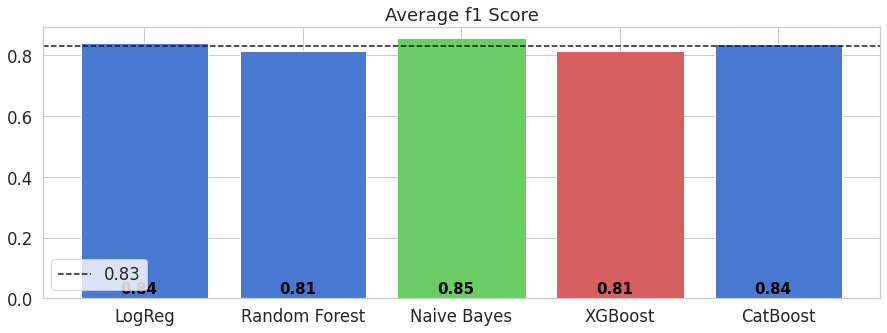

In [119]:

# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

In [120]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 1))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
tfidf_vect_test = tfidf_vect_test.toarray()

**Logistic Regression with TF-IDF**

In [121]:
# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

f1 score: 0.8337705244647363


**Classification Report**

In [122]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       626
           1       0.93      0.84      0.88      1875

    accuracy                           0.83      2501
   macro avg       0.77      0.82      0.79      2501
weighted avg       0.85      0.83      0.83      2501



**Confusion Matrix**

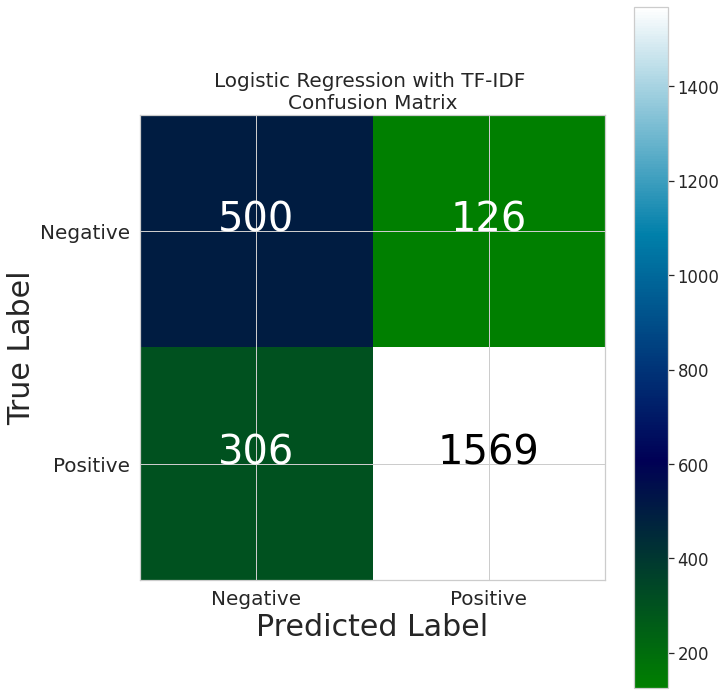

In [123]:
# Print confusion matrix for logistic regression with TF-IDF
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

**Random Forest with TF-IDF**


In [124]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

f1 score: 0.8043639210852082


**Classification Report**

In [125]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.87      0.38      0.53       626
           1       0.83      0.98      0.90      1875

    accuracy                           0.83      2501
   macro avg       0.85      0.68      0.71      2501
weighted avg       0.84      0.83      0.80      2501



**Confusion Matrix**

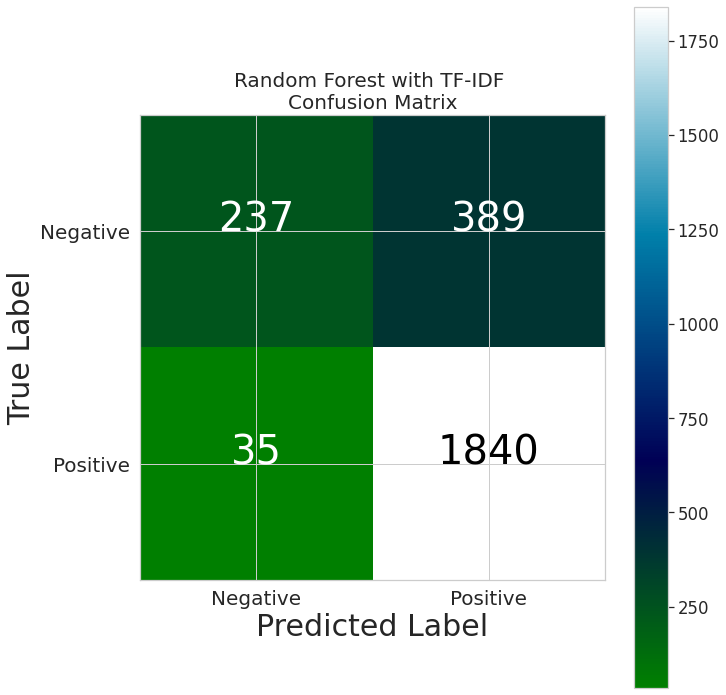

In [126]:
# Print confusion matrix for random forest classifier with TF-IDF
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

**Naive Bayes with TF-IDF**

In [127]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred

f1 score: 0.7221546720699129


**Classification Report**

In [128]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_nb))

              precision    recall  f1-score   support

           0       0.93      0.15      0.27       626
           1       0.78      1.00      0.87      1875

    accuracy                           0.79      2501
   macro avg       0.86      0.58      0.57      2501
weighted avg       0.82      0.79      0.72      2501



**Confusion Matrix**

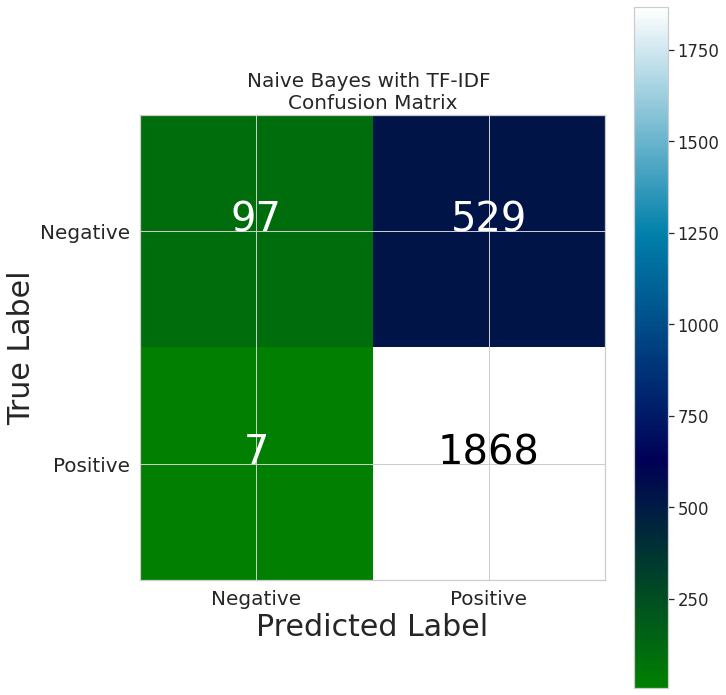

In [129]:
# Print confusion matrix for naive bayes with TF-IDF
disp_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

**XGBoost with TF-IDF**

In [130]:
# Call the modeling function for XGBoost with TF-IDF and print f1 score
modeling(XGBClassifier(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_xgb = y_pred

f1 score: 0.8110392385880808


**Classification Report**

In [131]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_xgb))

              precision    recall  f1-score   support

           0       0.85      0.41      0.55       626
           1       0.83      0.98      0.90      1875

    accuracy                           0.83      2501
   macro avg       0.84      0.69      0.72      2501
weighted avg       0.84      0.83      0.81      2501



**Confusion Matrix**

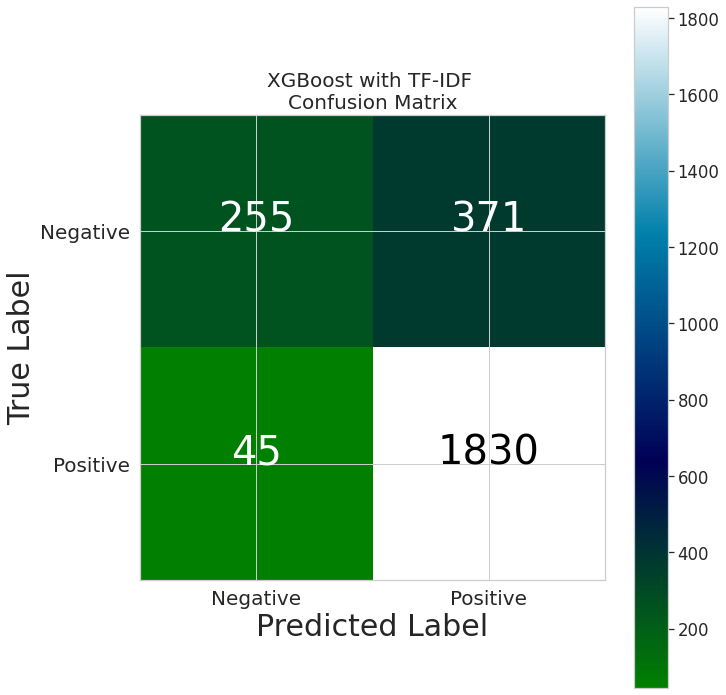

In [132]:
# Print confusion matrix for XGBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_xgb, "XGBoost", "TF-IDF")

**CatBoost with TF-IDF**

In [133]:
# Call the modeling function for Catboost with TF-IDF and print f1 score
modeling(CatBoostClassifier(iterations=100, learning_rate=0.8, depth=2, 
                            loss_function='Logloss'), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_catboost = y_pred

0:	learn: 0.5496176	total: 47.1ms	remaining: 4.66s
1:	learn: 0.5158935	total: 84.9ms	remaining: 4.16s
2:	learn: 0.4931512	total: 122ms	remaining: 3.94s
3:	learn: 0.4764411	total: 159ms	remaining: 3.82s
4:	learn: 0.4693102	total: 196ms	remaining: 3.72s
5:	learn: 0.4607866	total: 233ms	remaining: 3.64s
6:	learn: 0.4486237	total: 279ms	remaining: 3.71s
7:	learn: 0.4402223	total: 317ms	remaining: 3.64s
8:	learn: 0.4311386	total: 354ms	remaining: 3.58s
9:	learn: 0.4234024	total: 391ms	remaining: 3.52s
10:	learn: 0.4185052	total: 428ms	remaining: 3.46s
11:	learn: 0.4124555	total: 465ms	remaining: 3.41s
12:	learn: 0.4075658	total: 504ms	remaining: 3.37s
13:	learn: 0.4016445	total: 543ms	remaining: 3.33s
14:	learn: 0.3950111	total: 581ms	remaining: 3.29s
15:	learn: 0.3909597	total: 619ms	remaining: 3.25s
16:	learn: 0.3879291	total: 656ms	remaining: 3.2s
17:	learn: 0.3854299	total: 694ms	remaining: 3.16s
18:	learn: 0.3825438	total: 735ms	remaining: 3.13s
19:	learn: 0.3791669	total: 773ms	remain

**Classification Report**

In [134]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_catboost))

              precision    recall  f1-score   support

           0       0.71      0.55      0.62       626
           1       0.86      0.93      0.89      1875

    accuracy                           0.83      2501
   macro avg       0.79      0.74      0.76      2501
weighted avg       0.82      0.83      0.82      2501



**Confusion Matrix**

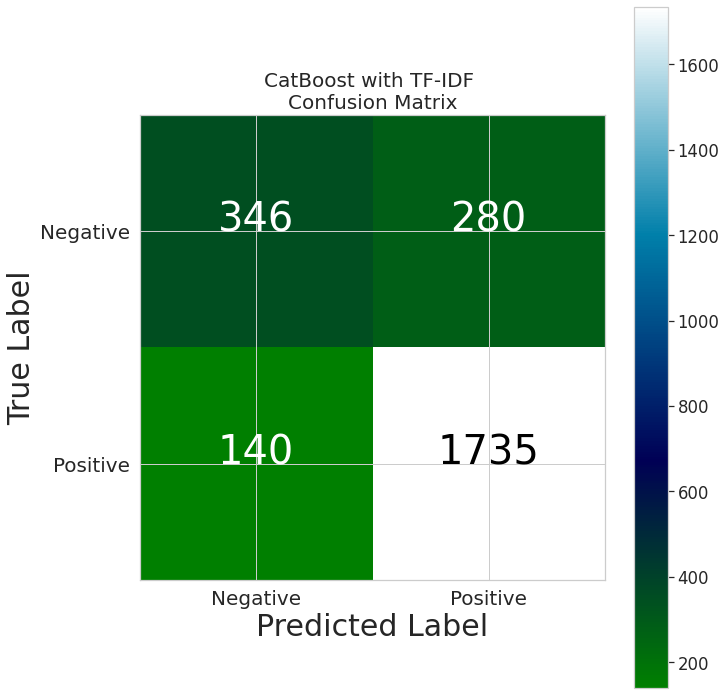

In [135]:
# Print confusion matrix for CatBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_catboost, "CatBoost", "TF-IDF")

In [136]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb, y_pred_tfidf_catboost], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost', 'CatBoost'])

In [137]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision  ...  support
vectorizer model         accuracy class                ...         
CountVect  LogReg        0.827269 Negative   0.620347  ...    626.0
                                  Positive   0.925664  ...   1875.0
                                  average    0.849243  ...   2501.0
           Random Forest 0.830468 Negative   0.871324  ...    626.0
                                  Positive   0.825482  ...   1875.0
                                  average    0.836956  ...   2501.0
           Naive Bayes   0.785686 Negative   0.932692  ...    626.0
                                  Positive   0.779307  ...   1875.0
                                  average    0.817700  ...   2501.0
           XGBoost       0.833667 Negative   0.850000  ...    626.0
                                  Positive   0.831440  ...   1875.0
                                  average    0.836086  ...   2501.0
           CatBoost      0.832067 Negative   0.711934  ...    626.0
                                  Positive   0.861042  ...   1875.0
                                  average    0.823720  ...   2501.0

[15 rows x 4 columns]

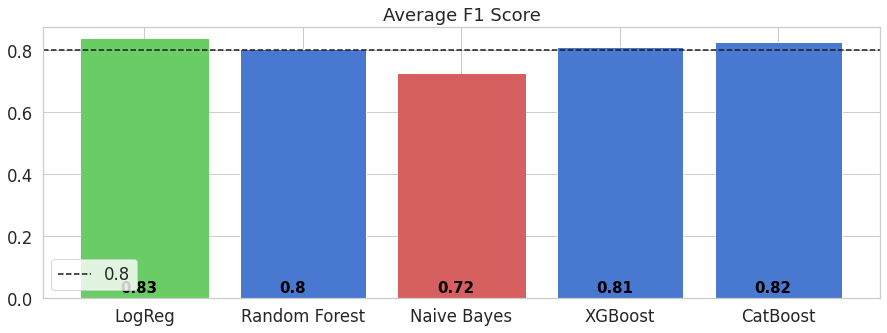

In [138]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")